In [1]:
####### SEGUIMIENTO DEL PLAN DE ATAQUE

In [143]:
#imports
import pandas as pd
import numpy as np
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score


from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [22]:
rawData = pd.read_csv('default of credit card clients.csv', header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [23]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [24]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [25]:
#dependent variable
depVar = rawData['default payment next month']
print (depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [26]:
#Training Set (Feature Space: X Training)
X_train = (features[: 1000])
X_train.head()
#Dependent Variable Training Set (y Training)
y_train = depVar[: 1000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 1000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: int64

In [27]:
#Testing Set (X Testing)
X_test = features[-100:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 100
       BILL_AMT1  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
29900      16809          0          0          0          0          0   
29901      50845      48750     103486      50590      50248      49387   
29902      10392     168088     168955     161351     126198     124746   
29903      27378      17082      13333         99         99     172104   
29904      54952      56021      54126      58732      59306      59728   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  
29900         0         0         0         0         0  
29901         0      6556      3250      1563      1208  
29902    168096      6409      7335      4448      4519  
29903     10018     13333        99        99    172104  
29904      2600      4553      5800      2000      1000  


In [28]:
#Ground Truth (y_test) 
y_test = depVar[-100:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 100


29900    1
29901    0
29902    0
29903    0
29904    1
Name: default payment next month, dtype: int64

In [29]:
#CrossValidation
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [30]:
X_train.shape, X_test.shape

((750, 11), (250, 11))

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((562, 11), (188, 11))

In [32]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()


In [33]:
#features
features = rawData.iloc[:,12:23]
print('Summary of feature sample')
features.head()

Summary of feature sample


,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5
0,3913,3102,689,0,0,0,0,689,0,0,0
1,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0
2,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000
3,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069
4,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689


In [34]:
#dependent variable
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: int64


In [35]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[-0.16257009 -0.22219331 -0.19289947]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.7581439922200905

In [37]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: -0.218
RMSE: 0.491


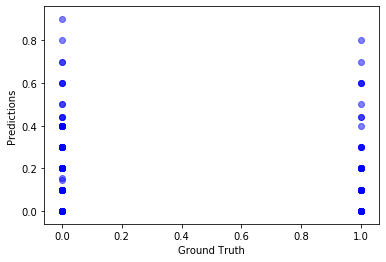

In [41]:
predictions = modelRF.predict(X_test)
plt.scatter(y_test, predictions, color=['blue'], alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [42]:
modelSVR.fit(X_train,y_train)
print(cross_val_score(modelSVR, X_train, y_train)) 
modelSVR.score(X_train,y_train)

[-0.03963848 -0.04606019 -0.02036332]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:19

0.864050110299344

In [43]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[-0.1349742   0.02767347 -0.01640805]


/Users/luisporras/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.04041930836363794

In [ ]:
######## RESOLUCION DEL PROBLEMA

In [120]:
#Preprocessing
creditData = pd.read_csv('default of credit card clients.csv', header=1)
creditData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [121]:

#Eliminacion de columna Unnamed  que corresponde ID
creditData.drop('ID', axis = 1, inplace=True)
creditData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [123]:
#Eliminando columnas
creditData = creditData.drop(['SEX','PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'], axis=1)

In [124]:
# covarianza
np.cov(creditData) 

array([[7.99441063e+07, 4.79801114e+08, 3.59836152e+08, ...,
        1.19916165e+08, 3.19842184e+08, 1.99880207e+08],
       [4.79801114e+08, 2.87962812e+09, 2.15963266e+09, ...,
        7.19701678e+08, 1.91960020e+09, 1.19962272e+09],
       [3.59836152e+08, 2.15963266e+09, 1.61965822e+09, ...,
        5.39754237e+08, 1.43964126e+09, 8.99680298e+08],
       ...,
       [1.19916165e+08, 7.19701678e+08, 5.39754237e+08, ...,
        1.79874256e+08, 4.79763285e+08, 2.99820322e+08],
       [3.19842184e+08, 1.91960020e+09, 1.43964126e+09, ...,
        4.79763285e+08, 1.27963232e+09, 7.99685359e+08],
       [1.99880207e+08, 1.19962272e+09, 8.99680298e+08, ...,
        2.99820322e+08, 7.99685359e+08, 4.99750406e+08]])

In [125]:
#Categorizando las variables
creditData['EDUCATION'] = creditData['EDUCATION'].astype('category')
creditData['MARRIAGE'] = creditData['MARRIAGE'].astype('category')

# Se crean compartimentos para la EDAD, usando la funcion cut de pandas, se definen los compartimentos deseados unidades de 10.
creditData['edad_bins'] = pd.cut(creditData['AGE'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90]).cat.codes
# Se crean compartimentos para la LIMIT_BALL, usando la funcion cut de pandas, se definen
#los compartimentos deseados en unidades de 100mil.
creditData['limiteCredito_bins'] = pd.cut(creditData['LIMIT_BAL'], bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]).cat.codes

creditData['default payment next month'] = creditData['default payment next month'].astype('category')

In [126]:
creditData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
LIMIT_BAL                     30000 non-null int64
EDUCATION                     30000 non-null category
MARRIAGE                      30000 non-null category
AGE                           30000 non-null int64
default payment next month    30000 non-null category
edad_bins                     30000 non-null int8
limiteCredito_bins            30000 non-null int8
dtypes: category(3), int64(2), int8(2)
memory usage: 616.0 KB


In [127]:
creditData.head()

,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,default payment next month,edad_bins,limiteCredito_bins
0,20000,2,1,24,1,2,0
1,120000,2,2,26,1,2,1
2,90000,2,2,34,0,3,0
3,50000,2,1,37,0,3,0
4,50000,2,1,57,0,5,0


In [128]:
#Variable Dependiente
dependiente = creditData['default payment next month']


In [129]:
#Entrenamiento
X_train = creditData.loc[:,['EDUCATION','MARRIAGE','edad_bins','limiteCredito_bins']]
X_train.shape


(30000, 4)

In [130]:
#Dependent Variable Training Set (y Training)
y_train = dependiente
y_train.shape

(30000,)

In [131]:
X_train, X_test, y_train, y_test = split(X_train,y_train)

In [132]:
X_train.shape,X_test.shape


((22500, 4), (7500, 4))

In [133]:
y_train.shape, y_test.shape

((22500,), (7500,))

In [134]:
#Modelos de clasificacion



In [135]:
#K-nearest neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

mdl_knn = KNeighborsClassifier(n_neighbors=5)
mdl_knn = mdl_knn.fit(X_train, y_train)
pred_knn = mdl_knn.predict(X_test)

print ("KNN exactitud: ",accuracy_score(y_test, pred_knn))

KNN exactitud:  0.7532


In [136]:
mdl_knn.score(X_train, y_train)

0.7478666666666667

In [137]:

from sklearn.ensemble import RandomForestClassifier

mdl_RF = RandomForestClassifier(n_estimators=500, max_depth=5)

mdl_RF.fit(X_train, y_train)
pred_RF = mdl_RF.predict(X_test)
print ("RF exactitud: ",accuracy_score(y_test, pred_RF))

RF exactitud:  0.7862666666666667


In [138]:
mdl_RF.score(X_train, y_train)

0.7763111111111111

In [139]:
#Naïve Bayes es uno de los clasificadores más utilizados por su simplicidad y rapidez. 
#Se trata de una técnica de clasificación
#y predicción supervisada que construye modelos que predicen la probabilidad de posibles resultados

from sklearn.naive_bayes import GaussianNB

mdl_gnb = GaussianNB()
mdl_gnb.fit(X_train, y_train)
pred_gnb = mdl_gnb.predict(X_test)
print ("NaiveBayes exactitud: ",accuracy_score(y_test, pred_gnb))


NaiveBayes exactitud:  0.7862666666666667


In [140]:
#K-nearest neighbors (KNN) con vecinos = 4 tiene el mejor desempeño con una exactitud de 0.75

In [144]:
# Matriz de confusion
confusion_matrix = confusion_matrix(y_test, pred_knn)
print(confusion_matrix)

[[5551  346]
 [1505   98]]


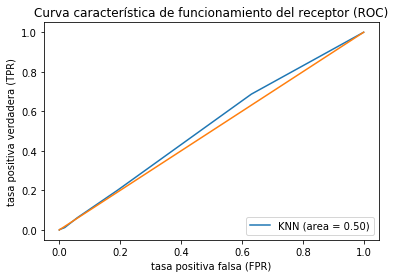

In [145]:
#Curva característica de funcionamiento del receptor o curva ROC, 
#se aplica para poder visualizar la capacidad de diagnóstico del clasificador a KNN 
#a medida que varia su umbral de discriminacion.
#La curva ROC se crea trazando la tasa positiva verdadera (TPR) contra la tasa positiva falsa (FPR)
#en varios ajustes de umbral. 
#La tasa positiva verdadera también se conoce como sensibilidad o probabilidad de detección. 
#La tasa de falsos positivos también se conoce como probabilidad de falsa alarma
#y se puede calcular como (1 - especificidad)

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
knn_roc_auc = roc_auc_score(y_test, mdl_knn.predict(X_test))


fpr, tpr,thresholds = roc_curve(y_test, mdl_knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1])
plt.xlabel('tasa positiva falsa (FPR)')
plt.ylabel('tasa positiva verdadera (TPR)')
plt.title('Curva característica de funcionamiento del receptor (ROC)')
plt.legend(loc="lower right")
plt.show()

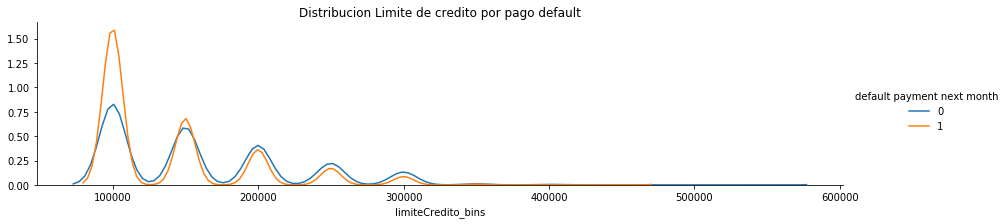

In [148]:
# Distribucion Limite de credito por pago default
limiteDist = sns.FacetGrid(creditData, hue='default payment next month', aspect=4)
limiteDist.map(sns.kdeplot, 'limiteCredito_bins')
limiteDist.set(title='Distribucion Limite de credito por pago default')

bins=[0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]
labels = [i for i in bins]
limiteDist.set_xticklabels( labels)
limiteDist.add_legend()
limiteDist.savefig('limiteDist')



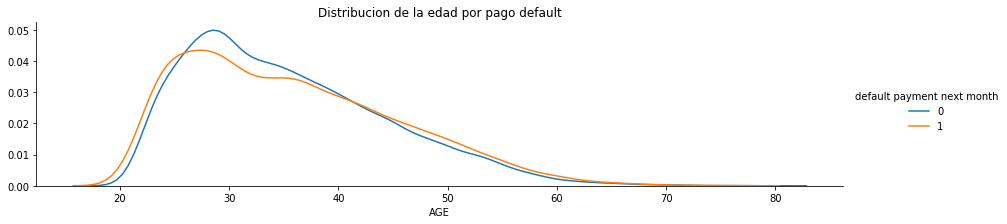

In [156]:
# Distribucion de la edad por pago default 
edadDist = sns.FacetGrid(creditData, hue='default payment next month', aspect=4)
edadDist.map(sns.kdeplot, 'AGE')
edadDist.set(title='Distribucion de la edad por pago default')
edadDist.add_legend()
edadDist.savefig('edadDist')

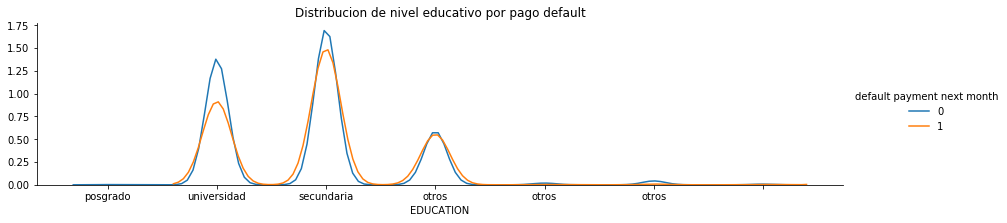

In [157]:
# Distribucion de nivel educativo por pago default 
eduDist = sns.FacetGrid(creditData, hue='default payment next month', aspect=4)
eduDist.map(sns.kdeplot, 'EDUCATION')
eduDist.set(title='Distribucion de nivel educativo por pago default')
eduDist.add_legend()
nivel=['otros','posgrado', 'universidad', 'secundaria', 'otros', 'otros', 'otros']
labels = [i for i in nivel]
eduDist.set_xticklabels( labels)
eduDist.savefig('eduDist')
